In [51]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import special

In [84]:
""" 1.a """
n, p = 2, 0.5 # τιμ΄΄ή bit 0 ή 1 με ίση πιθανότητα εμφάνισης 0.5
bitstream_len = 36
bits = np.random.binomial(1, 0.5, bitstream_len) # τυχαία ακολουθία από 36 bits

print("Random " + str(bitstream_len) + "-bit stream")
print(bits)

Random 36-bit stream
[0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0]


Random 36-bit stream
[0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1]


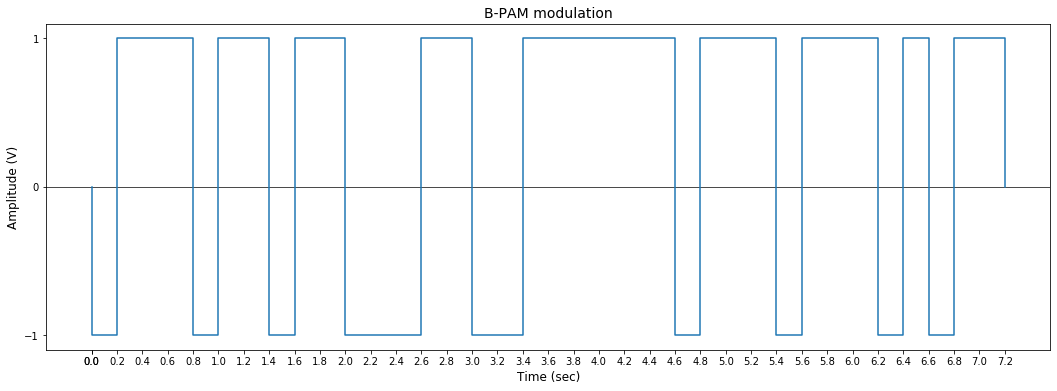

In [83]:
""" ΑΜ: 03115082 άρα 0+8+2=10 και 1+0=1 οπότε A = 1 Volt"""
AM = 1

""" ΑΜ: 03115151 άρα 1+5+1=7 οπότε A = 7 Volts """
#AM = 7

Tb = 0.2 #sec (διάρκεια κάθε bit)
A = AM #Volts (πλάτος)


bitsB_PAM = [0.0]
time = [0.0]

bpam = lambda b : (2*A*b - A)

""" το πρώτο και το τελευταίο στοιχείο είναι 0.0 και χρησιμεύει μόνο για την χάραξη της γραφικής παράστασης του σήματος """
t = 0.0
for bit in bits:
    bitsB_PAM.append(bpam(bit))
    time.append(t)
    t += Tb
    
bitsB_PAM.append(0.0)
time.append(len(bits)*Tb)

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('B-PAM modulation', fontsize = 14)
ax.set_xlabel('Time (sec)', fontsize = 12)
ax.set_ylabel('Amplitude (V)', fontsize = 12)
plt.axhline(y=0, color='k', linewidth=0.7)
plt.step(time, bitsB_PAM, where = 'post')
plt.xticks(time)
plt.yticks([-A,0,A])
plt.show()

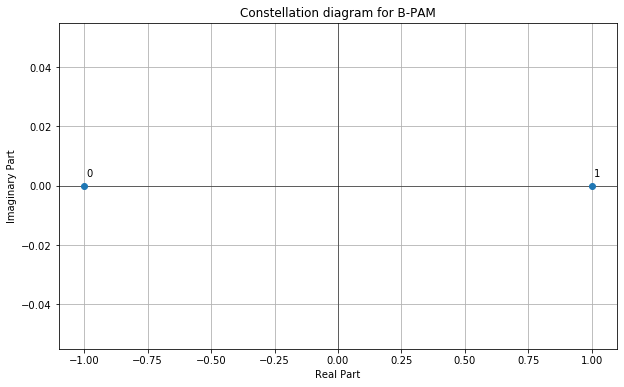

In [53]:
""" 1.b """
# Έχουμε τις τιμές -Α για το bit 0 και A για το bit 1
v0 = -A
v1 = A
x = [v0.real, v1.real]
y = [v0.imag, v1.imag]
bits = ['0', '1']
fig = plt.figure(figsize=(10,6))
plt.axhline(y=0, linewidth=0.5, color='0')
plt.axvline(x=0, linewidth=0.5, color='0')
plt.plot(x, y, 'o')
for i, bit in enumerate(bits):
    plt.annotate(bit, (x[i] + 0.01, y[i] + 0.003))
plt.title('Constellation diagram for B-PAM')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.show()

In [54]:
""" 1.c """
class AWGN:
    def __init__(self, N0, lenght):
        # Z = X + jY (AWGN signal)
        self.real = np.random.normal(0, np.sqrt(N0/2), size=lenght) #X
        self.imag = np.random.normal(0, np.sqrt(N0/2), size=lenght) #Y

def add_AWGN(signal, AWGN):
    # προσθέτουμε τον AWGN θόρυβο στο σήμα
    yout = []
    for i in range(0, len(signal)):
        yout.append(signal[i] + complex(AWGN.real[i],AWGN.imag[i]))
    
    return yout

Eb = (A**2)*Tb # Ενέργεια παλμού σήματος
calculate_N0 = lambda SNR : Eb / 10**(SNR/10)

In [56]:
# Eb/N0 = 6dB
SNR = 6 #dB
AWGNsignal = AWGN(calculate_N0(SNR), len(bitsB_PAM))
""" το πρώτο και το τελευταίο στοιχείο είναι 0.0 και χρησιμεύει μόνο για την χάραξη της
    γραφικής παράστασης του σήματος άρα τα θέτουμε και στον AWGN θόρυβο ίσα με 0.0 """
AWGNsignal.real[0] = 0.0
AWGNsignal.real[len(AWGNsignal.real)-1] = 0.0
AWGNsignal.imag[0] = 0.0
AWGNsignal.imag[len(AWGNsignal.real)-1] = 0.0

s1 = add_AWGN(bitsB_PAM, AWGNsignal)

In [57]:
# Eb/N0 = 12dB
SNR = 12 #dB
AWGNsignal = AWGN(calculate_N0(SNR), len(bitsB_PAM))
""" το πρώτο και το τελευταίο στοιχείο είναι 0.0 και χρησιμεύει μόνο για την χάραξη της
    γραφικής παράστασης του σήματος άρα τα θέτουμε και στον AWGN θόρυβο ίσα με 0.0 """
AWGNsignal.real[0] = 0.0
AWGNsignal.real[len(AWGNsignal.real)-1] = 0.0
AWGNsignal.imag[0] = 0.0
AWGNsignal.imag[len(AWGNsignal.real)-1] = 0.0

s2 = add_AWGN(bitsB_PAM, AWGNsignal)

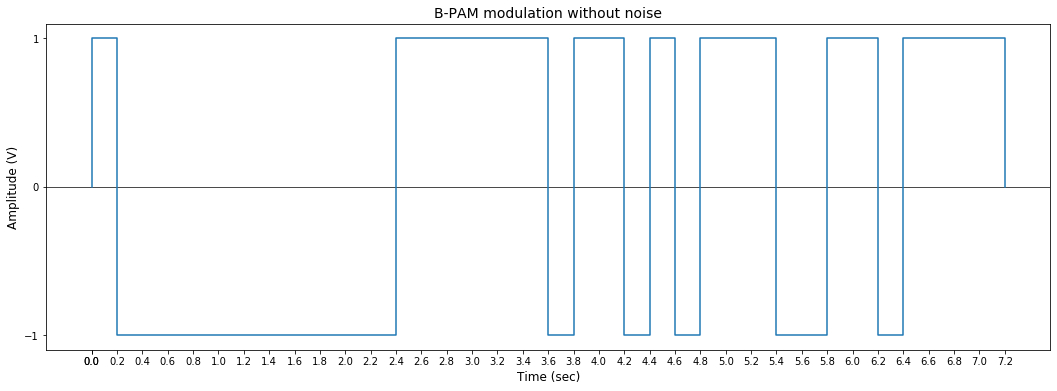

c:\users\vassi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


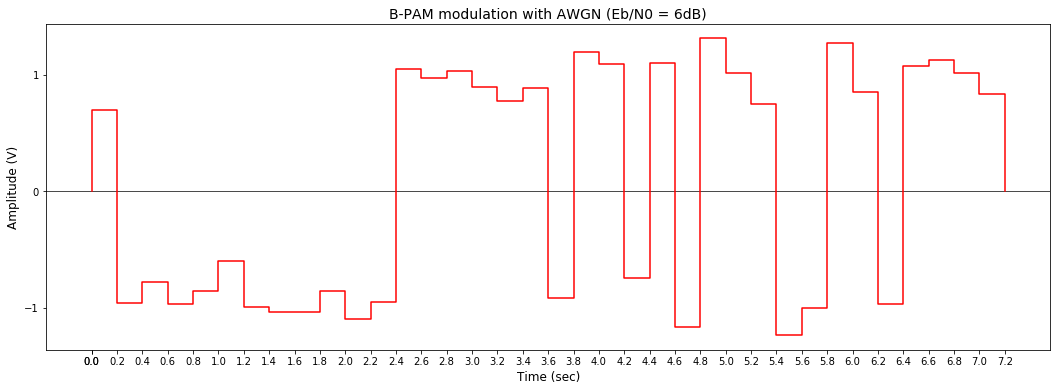

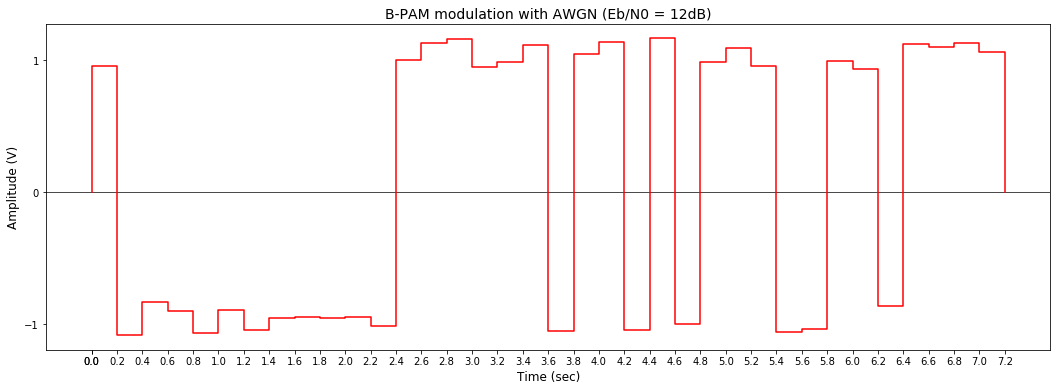

In [58]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('B-PAM modulation without noise', fontsize = 14)
ax.set_xlabel('Time (sec)', fontsize = 12)
ax.set_ylabel('Amplitude (V)', fontsize = 12)
plt.axhline(y=0, color='k', linewidth=0.7)
plt.step(time, bitsB_PAM, where = 'post')
plt.xticks(time)
plt.yticks([-A,0,A])
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('B-PAM modulation with AWGN (Eb/N0 = 6dB)', fontsize = 14)
ax.set_xlabel('Time (sec)', fontsize = 12)
ax.set_ylabel('Amplitude (V)', fontsize = 12)
plt.axhline(y=0, color='k', linewidth=0.7)
plt.step(time, s1, 'r', where = 'post')
plt.xticks(time)
plt.yticks([-A,0,A])
plt.show()

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
ax.set_title('B-PAM modulation with AWGN (Eb/N0 = 12dB)', fontsize = 14)
ax.set_xlabel('Time (sec)', fontsize = 12)
ax.set_ylabel('Amplitude (V)', fontsize = 12)
plt.axhline(y=0, color='k', linewidth=0.7)
plt.step(time, s2, 'r', where = 'post')
plt.xticks(time)
plt.yticks([-A,0,A])
plt.show()

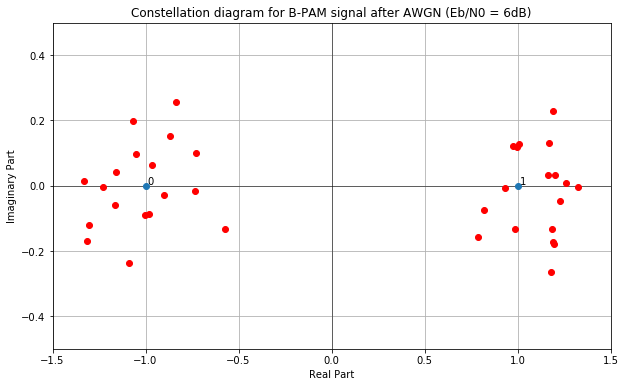

In [9]:
""" 1.d """
# Διάγραμμα αστερισμού για το σήμα s1
v0 = -A
v1 = A
x = [v0.real, v1.real]
y = [v0.imag, v1.imag]
bits = ['0', '1']
fig = plt.figure(figsize=(10,6))
plt.axhline(y=0, linewidth=0.5, color='0')
plt.axvline(x=0, linewidth=0.5, color='0')
plt.plot(x, y, 'o')
for i in range(1, len(s1)-1):
    X = s1[i].real
    Y = s1[i].imag
    plt.plot(X, Y, 'o', color='r')
for i, bit in enumerate(bits):
    plt.annotate(bit, (x[i] + 0.01, y[i] + 0.003))
plt.title('Constellation diagram for B-PAM signal after AWGN (Eb/N0 = 6dB)')
plt.xlabel('Real Part')
plt.xlim([-1.5 * A, 1.5 * A])
plt.ylabel('Imaginary Part')
plt.ylim([-0.5 * A, 0.5 * A])
plt.grid(True)
plt.show()

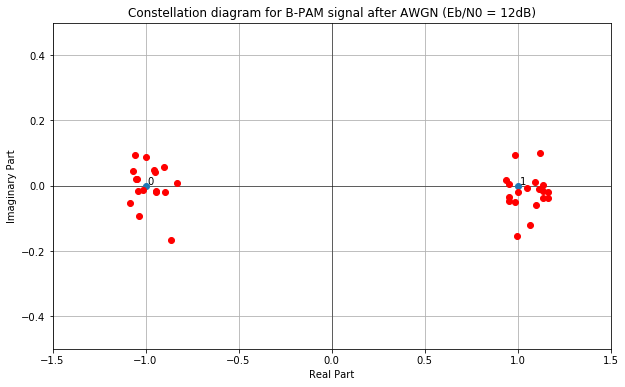

In [80]:
# Διάγραμμα αστερισμού για το σήμα s2
v0 = -A
v1 = A
x = [v0.real, v1.real]
y = [v0.imag, v1.imag]
bits = ['0', '1']
fig = plt.figure(figsize=(10,6))
plt.axhline(y=0, linewidth=0.5, color='0')
plt.axvline(x=0, linewidth=0.5, color='0')
plt.plot(x, y, 'o')
for i in range(1, len(s1)-1):
    X = s2[i].real
    Y = s2[i].imag
    plt.plot(X, Y, 'o', color='r')
for i, bit in enumerate(bits):
    plt.annotate(bit, (x[i] + 0.01, y[i] + 0.003))
plt.title('Constellation diagram for B-PAM signal after AWGN (Eb/N0 = 12dB)')
plt.xlabel('Real Part')
plt.xlim([-1.5 * A, 1.5 * A])
plt.ylabel('Imaginary Part')
plt.ylim([-0.5 * A, 0.5 * A])
plt.grid(True)
plt.show()

In [60]:
""" 1.e """
n, p = 2, 0.5 # τιμ΄΄ή bit 0 ή 1 με ίση πιθανότητα εμφάνισης 0.5
bitstream_len = 1000000 # ένας ικανοποιητικός αριθμός τυχαίων bits

# Δοκιμάζουμε SNR από 0 έως 15 dB
SNR = np.arange(0,16,1)

BER_exp = np.zeros(16) # πειραματικό BER

# υπολογισμός θεωρητικού BER
Q = lambda z : 0.5*special.erfc(z/np.sqrt(2))
calc_BER_th = lambda SNR : Q(A/np.sqrt(calculate_N0(SNR)/2))
snr = np.arange(0,16,0.1)
BER_th = list(map(calc_BER_th, snr))

decoder = lambda v : 1 if (v.real >= 0) else 0
# αν η αποκοδικοπποίηση βρήκε διαφορετική τιμή απ την πραγματική τιμή του bit έχουμε error
error = lambda bit, v : (bit != decoder(v))

for Snr in SNR:
    bits = np.random.binomial(1, 0.5, size=bitstream_len) #τυχαία ακολουθία από 1000000 bits
    B_PAM = list(map(bpam, bits))
    
    AWGNsignal = AWGN(calculate_N0(Snr), bitstream_len)
    s = add_AWGN(B_PAM, AWGNsignal) #σήμα μαζί με τον AWGN θόρυβο
    
    errors = 0
    for i, bit in enumerate(bits):
        if (error(bit, s[i])):
            errors += 1
            
    BER_exp[Snr] = errors / bitstream_len

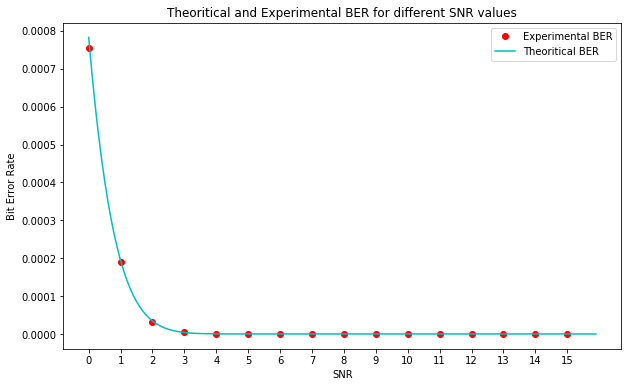

In [77]:
fig = plt.figure(figsize=(10,6))
plt.plot(SNR, BER_exp, 'o', color = 'r', label = 'Experimental BER')
plt.plot(snr, BER_th, color = 'c', label = 'Theoritical BER')
plt.xticks(SNR)
plt.title('Theoritical and Experimental BER for different SNR values')
plt.xlabel('SNR')
plt.ylabel('Bit Error Rate')
plt.legend()
plt.show()